# Lecture 2: Linear Regressions

Here, we'll see examples of how to use the scikit-learn linear regression class, as well as the statsmodels OLS function, which is much more similar to R's lm function.

[http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression_)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

Let's make a random dataset where X is uniformly distributed between 0 and 1, and y is a consine function plus noise:

In [3]:
np.random.seed(0)

n_samples = 30

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

X = np.sort(np.random.rand(n_samples))
noise_size = 0.1
y = true_fun(X) + np.random.randn(n_samples) * noise_size

In [4]:
X.shape

(30,)

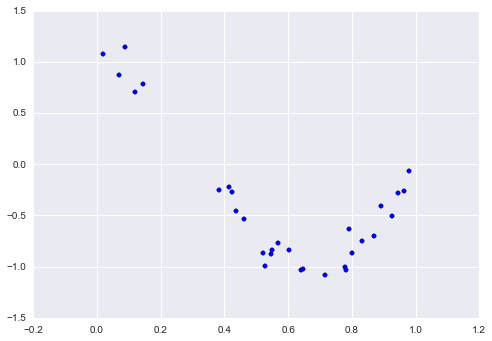

In [5]:
plt.scatter(X, y)

The scikit-learn linear regression class has the same programming interface we saw with k-NN:

In [6]:
linear_regression = LinearRegression()
linear_regression.fit(X.reshape((30, 1)), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We can get the parameters of the fit:

In [7]:
print linear_regression.intercept_
print linear_regression.coef_

0.536680330318
[-1.60931179]


And we can print the predictions as a line:

In [15]:
# equally spaced array of 100 values between 0 and 1, like the seq function in R
X_to_pred = np.linspace(0, 1, 100).reshape(100, 1)

preds = linear_regression.predict(X_to_pred)

plt.scatter(X, y)
plt.plot(X_to_pred, preds)
plt.show()

ValueError: shapes (100,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

Let's fit a model of the form $y \sim x + x^2$.

In [9]:
X**2

array([  4.08783595e-04,   5.04612156e-03,   7.59151487e-03,
         1.39888398e-02,   2.05501650e-02,   1.47027398e-01,
         1.71944524e-01,   1.79483389e-01,   1.91482567e-01,
         2.12963202e-01,   2.72325671e-01,   2.79729836e-01,
         2.96897683e-01,   3.01196262e-01,   3.22674623e-01,
         3.63323688e-01,   4.09498914e-01,   4.17179205e-01,
         5.11495830e-01,   6.05527929e-01,   6.09225795e-01,
         6.26828536e-01,   6.38654411e-01,   6.93255807e-01,
         7.56921138e-01,   7.95259085e-01,   8.56729137e-01,
         8.92399363e-01,   9.28645916e-01,   9.57693860e-01])

In [10]:
X2 = np.column_stack((X, X**2))
X2

array([[  2.02183974e-02,   4.08783595e-04],
       [  7.10360582e-02,   5.04612156e-03],
       [  8.71292997e-02,   7.59151487e-03],
       [  1.18274426e-01,   1.39888398e-02],
       [  1.43353287e-01,   2.05501650e-02],
       [  3.83441519e-01,   1.47027398e-01],
       [  4.14661940e-01,   1.71944524e-01],
       [  4.23654799e-01,   1.79483389e-01],
       [  4.37587211e-01,   1.91482567e-01],
       [  4.61479362e-01,   2.12963202e-01],
       [  5.21848322e-01,   2.72325671e-01],
       [  5.28894920e-01,   2.79729836e-01],
       [  5.44883183e-01,   2.96897683e-01],
       [  5.48813504e-01,   3.01196262e-01],
       [  5.68044561e-01,   3.22674623e-01],
       [  6.02763376e-01,   3.63323688e-01],
       [  6.39921021e-01,   4.09498914e-01],
       [  6.45894113e-01,   4.17179205e-01],
       [  7.15189366e-01,   5.11495830e-01],
       [  7.78156751e-01,   6.05527929e-01],
       [  7.80529176e-01,   6.09225795e-01],
       [  7.91725038e-01,   6.26828536e-01],
       [  

In [11]:
linear_regression.fit(X2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print linear_regression.intercept_
print linear_regression.coef_

1.54114868724
[-7.31956683  5.55955392]


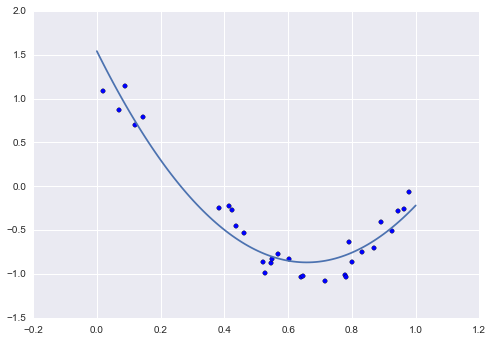

In [17]:
# equally spaced array of 100 values between 0 and 1, like the seq function in R
X_p = np.linspace(0, 1, 100).reshape(100, 1)
X_to_pred = np.column_stack((X_p, X_p**2))

preds = linear_regression.predict(X_to_pred)

plt.scatter(X, y)
plt.plot(X_p, preds)
plt.show()

## Statsmodels

The `statsmodels` package provides statistical functionality a lot like R's for doing OLS.

[http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/ols.html](http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/ols.html)

In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

np.random.seed(9876789)

### Using A Formula to Fit to a Pandas Dataframe

[http://statsmodels.sourceforge.net/0.6.0/examples/notebooks/generated/formulas.html](http://statsmodels.sourceforge.net/0.6.0/examples/notebooks/generated/formulas.html)

In [19]:
dta = sm.datasets.get_rdataset("Guerry", "HistData", cache=True)

In [21]:
original_df = dta.data
original_df.head()
subsetted_df = original_df[['Lottery', 'Literacy', 'Wealth', 'Region']]
subsetted_df.head(100)

,Lottery,Literacy,Wealth,Region
0,41,37,73,E
1,38,51,22,N
2,66,13,61,C
3,80,46,76,E
4,79,69,83,E
5,70,27,84,S
6,31,67,33,N
7,75,18,72,S
8,28,59,14,E
9,50,34,17,S


In [22]:
df = dta.data[['Lottery', 'Literacy', 'Wealth', 'Region']].dropna()
df.head()

,Lottery,Literacy,Wealth,Region
0,41,37,73,E
1,38,51,22,N
2,66,13,61,C
3,80,46,76,E
4,79,69,83,E


In [23]:
mod = smf.ols(formula='Lottery ~ Literacy + Wealth + Region + Literacy:Wealth', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     5.615
Date:                Wed, 07 Oct 2015   Prob (F-statistic):           2.96e-05
Time:                        20:22:25   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             766.6
Df Residuals:                      77   BIC:                             786.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          39.0993     17.470     

In [26]:
mod = smf.ols(formula='Lottery ~ Literacy + Wealth + I(Wealth ** 2.0) + I(Wealth ** 3.0) + Region + Literacy:Wealth', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     4.988
Date:                Wed, 07 Oct 2015   Prob (F-statistic):           2.92e-05
Time:                        20:24:41   Log-Likelihood:                -372.89
No. Observations:                  85   AIC:                             765.8
Df Residuals:                      75   BIC:                             790.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           12.0464     22.334  

If it were an integer code instead of a string, we could explicitly make `Region` categorical like this:

In [27]:
res = smf.ols(formula='Lottery ~ Literacy + Wealth + C(Region)', data=df).fit()
print(res.params)

Intercept         38.651655
C(Region)[T.E]   -15.427785
C(Region)[T.N]   -10.016961
C(Region)[T.S]    -4.548257
C(Region)[T.W]   -10.091276
Literacy          -0.185819
Wealth             0.451475
dtype: float64


### Using numpy matrices directly

Let's construct a dataset which is $y \sim 1+0.1x+10x^2+N(0,1)$:

In [ ]:
nsample = 500

x = np.linspace(0, 10, 500)
X = np.column_stack((x, x**2))

beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [ ]:
model = sm.OLS(y, X)
results = model.fit()
print results.summary()

We can access the fit parameters like this:

In [ ]:
print 'Parameters: ', results.params
print 'Standard errors: ', results.bse
print 'Predicted values: ', results.predict()

Now let's see an example with a categorical value with several levels, and how to expand it to dummies like the R lm function:

In [ ]:
nsample = 50

# make an array that is all zeroes
groups = np.zeros(nsample, int)
# make some of the values 1's
groups[20:40] = 1
# and make some of them 2's
groups[40:] = 2

groups

In [ ]:
# have statsmodels expand the categorical variable into dummies
dummy = sm.categorical(groups, drop=True)
dummy

Let's construct a dataset which is $y \sim 0.1+3x-3group_1+10group_2+N(0,1)$:

In [ ]:
x = np.linspace(0, 20, nsample)
# drop reference category
X = np.column_stack((x, dummy[:,1:]))
X = sm.add_constant(X)

beta = [1., 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

In [ ]:
res2 = sm.OLS(y, X).fit()
print res2.summary()